The objective is to analyze the Melbourne housing market by answering key questions to provide valuable insights for prospective home buyers.

In [112]:
# imports
import pandas as pd  
import re
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [142]:
import geopandas as gpd

ModuleNotFoundError: No module named 'geopandas'

In [113]:
# Load data
df = pd.read_csv('melb_data.csv')

In [114]:
# Look at the data
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [115]:
df.tail()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
13575,Wheelers Hill,12 Strada Cr,4,h,1245000.0,S,Barry,26/08/2017,16.7,3150.0,...,2.0,2.0,652.0,NaN,1981.0,NaN,-37.90562,145.16761,South-Eastern Metropolitan,7392.0
13576,Williamstown,77 Merrett Dr,3,h,1031000.0,SP,Williams,26/08/2017,6.8,3016.0,...,2.0,2.0,333.0,133.0,1995.0,NaN,-37.85927,144.87904,Western Metropolitan,6380.0
13577,Williamstown,83 Power St,3,h,1170000.0,S,Raine,26/08/2017,6.8,3016.0,...,2.0,4.0,436.0,NaN,1997.0,NaN,-37.85274,144.88738,Western Metropolitan,6380.0
13578,Williamstown,96 Verdon St,4,h,2500000.0,PI,Sweeney,26/08/2017,6.8,3016.0,...,1.0,5.0,866.0,157.0,1920.0,NaN,-37.85908,144.89299,Western Metropolitan,6380.0
13579,Yarraville,6 Agnes St,4,h,1285000.0,SP,Village,26/08/2017,6.3,3013.0,...,1.0,1.0,362.0,112.0,1920.0,NaN,-37.81188,144.88449,Western Metropolitan,6543.0


In [116]:
# Check data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

In [117]:
# missing data
df.isnull().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

The dataset includes a mix of categorical and numeric variables. Some variables have missing values, but the target variable, price, is a float and contains no missing values.

In [118]:
df.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,-37.809203,144.995216,7454.417378
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,0.079260,0.103916,4378.581772
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


There are some varaibles probably need to take some focus:

The range for the Price is really large from 85,000 to 9,000,000.
Some of the property do not have bedroom and bathroom.
The landsize and building area have some value in zero, and there maximum value are really large.
The oldest year built is in 1196 which possibly entry mistake.


Let first look at the year built before 1800

In [119]:
df[df['YearBuilt']<1800]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
9968,Mount Waverley,5 Armstrong St,3,h,1200000.0,VB,McGrath,24/06/2017,14.2,3149.0,...,1.0,4.0,807.0,117.0,1196.0,Monash,-37.86788,145.12121,Eastern Metropolitan,13366.0


The largest landsize in here is one third of the suburb 'Fitzory'. It may the entry mistake, we will let the value ten times smaller.

In [120]:
df.loc[df['Landsize'] > 100000]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
11020,Fitzroy,389 Gore St,3,h,2700000.0,VB,Kay,12/08/2017,2.1,3065.0,...,3.0,1.0,433014.0,NaN,NaN,Yarra,-37.79751,144.98309,Northern Metropolitan,5825.0


In [121]:
df.loc[df['Landsize'] > 100000, 'Landsize'] = df.loc[df['Landsize'] > 100000, 'Landsize'] // 10


Comparing to the house that built in Mount Waverley, the house in this suburb probably built in 1900s or later

In [122]:
df[df['Suburb']=='Mount Waverley'].tail()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
13238,Mount Waverley,34 Park La,3,h,1586000.0,S,Stockdale,23/09/2017,14.2,3149.0,...,1.0,1.0,718.0,138.0,1955.0,NaN,-37.88061,145.12449,Eastern Metropolitan,13366.0
13239,Mount Waverley,8 Susan Ct,4,h,1408000.0,S,Jellis,23/09/2017,14.2,3149.0,...,2.0,2.0,692.0,179.0,1970.0,NaN,-37.86445,145.12538,Eastern Metropolitan,13366.0
13502,Mount Waverley,15 Anthony Dr,3,h,1028800.0,S,Jellis,26/08/2017,14.2,3149.0,...,2.0,1.0,470.0,118.0,1960.0,NaN,-37.88751,145.13545,Eastern Metropolitan,13366.0
13503,Mount Waverley,17 Huntingtower Cr,6,h,1840000.0,S,Jellis,26/08/2017,14.2,3149.0,...,2.0,2.0,554.0,368.0,1999.0,NaN,-37.87591,145.13958,Eastern Metropolitan,13366.0
13504,Mount Waverley,2/392 Stephensons Rd,3,t,1035000.0,SP,McGrath,26/08/2017,14.2,3149.0,...,2.0,2.0,236.0,138.0,2006.0,NaN,-37.88678,145.12748,Eastern Metropolitan,13366.0


Let's correct the entry mistake.

In [123]:
df.loc[df['YearBuilt'] == 1196, 'YearBuilt'] = 1996

For missing data in CouncilArea, we try to make a dictionary mapping from Suburb to CouncilArea

In [124]:
# Create a mapping from Suburb to CouncilArea
suburb_to_council = df.dropna(subset=['CouncilArea']).groupby('Suburb')['CouncilArea'].agg(lambda x: x.mode().iloc[0]).to_dict()

suburb_to_council

{'Abbotsford': 'Yarra',
 'Aberfeldie': 'Moonee Valley',
 'Airport West': 'Moonee Valley',
 'Albanvale': 'Brimbank',
 'Albert Park': 'Port Phillip',
 'Albion': 'Brimbank',
 'Alphington': 'Darebin',
 'Altona': 'Hobsons Bay',
 'Altona Meadows': 'Hobsons Bay',
 'Altona North': 'Hobsons Bay',
 'Ardeer': 'Brimbank',
 'Armadale': 'Stonnington',
 'Ascot Vale': 'Moonee Valley',
 'Ashburton': 'Boroondara',
 'Ashwood': 'Monash',
 'Aspendale': 'Kingston',
 'Aspendale Gardens': 'Kingston',
 'Avondale Heights': 'Moonee Valley',
 'Bacchus Marsh': 'Moorabool',
 'Balaclava': 'Port Phillip',
 'Balwyn': 'Boroondara',
 'Balwyn North': 'Boroondara',
 'Bayswater': 'Knox',
 'Bayswater North': 'Maroondah',
 'Beaconsfield': 'Cardinia',
 'Beaconsfield Upper': 'Cardinia',
 'Beaumaris': 'Bayside',
 'Bellfield': 'Banyule',
 'Bentleigh': 'Glen Eira',
 'Bentleigh East': 'Glen Eira',
 'Berwick': 'Casey',
 'Black Rock': 'Bayside',
 'Blackburn': 'Whitehorse',
 'Blackburn North': 'Whitehorse',
 'Blackburn South': 'White

The function to fill in the missing data in council area

In [125]:
def fill_council_area(row):
    if pd.isnull(row['CouncilArea']):
        return suburb_to_council.get(row['Suburb'], row['CouncilArea'])
    else:
        return row['CouncilArea']

filling missing data in council area

In [126]:
df.loc[df['CouncilArea'].isnull(), 'CouncilArea'] = df.loc[df['CouncilArea'].isnull()].apply(fill_council_area, axis=1)


In [127]:
df[df['CouncilArea'].isnull()]['Suburb']

12251        Burnside
12438         Attwood
12865          Wallan
13245    New Gisborne
13264        Plumpton
13381        Burnside
13494         Monbulk
Name: Suburb, dtype: object

According to the VIC website, we could know these suburb's council area.

In [128]:
remain_suburb_to_council = {
    'Burnside': 'Melton',
    'Attwood': 'Hume',
    'Wallan': 'Mitchell',
    'New Gisborne': 'Macedon Ranges',
    'Plumpton': 'Melton',
    'Monbulk': 'Yarra Ranges'
}

In [129]:
# Fill the missing CouncilArea values based on the remainder Suburb
df.loc[df['CouncilArea'].isnull(), 'CouncilArea'] = df.loc[df['CouncilArea'].isnull(), 'Suburb'].map(remain_suburb_to_council)

Checking the missing data in 'CouncilArea'.

In [130]:
df[df['CouncilArea'].isnull()]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount


Let's have a look at the missing data in 'Car', there are 62 missing value in 'Car'.

In [131]:
df[(df['Car'].isnull())]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
12221,Ascot Vale,132 The Parade,3,h,985000.0,S,Brad,3/09/2017,4.3,3032.0,...,1.0,NaN,245.0,91.0,1945.0,Moonee Valley,-37.77215,144.91144,Western Metropolitan,6567.0
12247,Brunswick East,18 Ethel St,2,h,1023000.0,S,Domain,3/09/2017,4.0,3057.0,...,1.0,NaN,154.0,76.0,1890.0,Moreland,-37.77221,144.97537,Northern Metropolitan,5533.0
12259,Clifton Hill,34 Fenwick St,3,h,1436000.0,S,Jellis,3/09/2017,3.6,3068.0,...,2.0,NaN,123.0,128.0,1990.0,Yarra,-37.78888,145.00036,Northern Metropolitan,2954.0
12320,Glen Waverley,19 Diamond Av,3,h,1370000.0,S,Fletchers,3/09/2017,16.7,3150.0,...,1.0,NaN,652.0,NaN,NaN,Monash,-37.87170,145.17267,Eastern Metropolitan,15321.0
12362,Newport,11 Collingwood Rd,4,h,1180000.0,PI,Williams,3/09/2017,6.2,3015.0,...,1.0,NaN,545.0,NaN,NaN,Hobsons Bay,-37.84399,144.89125,Western Metropolitan,5498.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13496,Moonee Ponds,46 Eglinton St,4,h,1525000.0,S,Nelson,26/08/2017,6.2,3039.0,...,3.0,NaN,233.0,NaN,NaN,Moonee Valley,-37.76884,144.91708,Western Metropolitan,6232.0
13508,North Melbourne,9 Erskine St,2,h,1080000.0,S,Jellis,26/08/2017,1.8,3051.0,...,1.0,NaN,100.0,67.0,1890.0,Melbourne,-37.79524,144.94642,Northern Metropolitan,6821.0
13522,Port Melbourne,201 Stokes St,2,h,1515000.0,SP,Marshall,26/08/2017,3.5,3207.0,...,2.0,NaN,197.0,NaN,NaN,Port Phillip,-37.83754,144.93954,Southern Metropolitan,8648.0
13524,Prahran,17 Packington Pl,2,h,1365000.0,S,Jellis,26/08/2017,4.6,3181.0,...,1.0,NaN,206.0,100.0,1900.0,Stonnington,-37.85569,145.00522,Southern Metropolitan,7717.0


60 missing values in 'Car' is house. 2 missing values is unit.

In [132]:
df[(df['Car'].isnull())&(df['Type']=='h')].shape[0]

60

In [133]:
df[(df['Car'].isnull())&(df['Type']!='h')]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
12818,Prahran,19 Porter St,1,u,515000.0,S,Biggin,16/09/2017,4.6,3181.0,...,1.0,NaN,284.0,NaN,NaN,Stonnington,-37.85018,144.99006,Southern Metropolitan,7717.0
13372,Brunswick,1/208 Albion St,1,u,424000.0,SP,Jellis,26/08/2017,5.2,3056.0,...,1.0,NaN,334.0,80.0,2009.0,Moreland,-37.76078,144.96168,Northern Metropolitan,11918.0


Let's see the number of car parking in different types of property to find out the reasonable value for car parking.

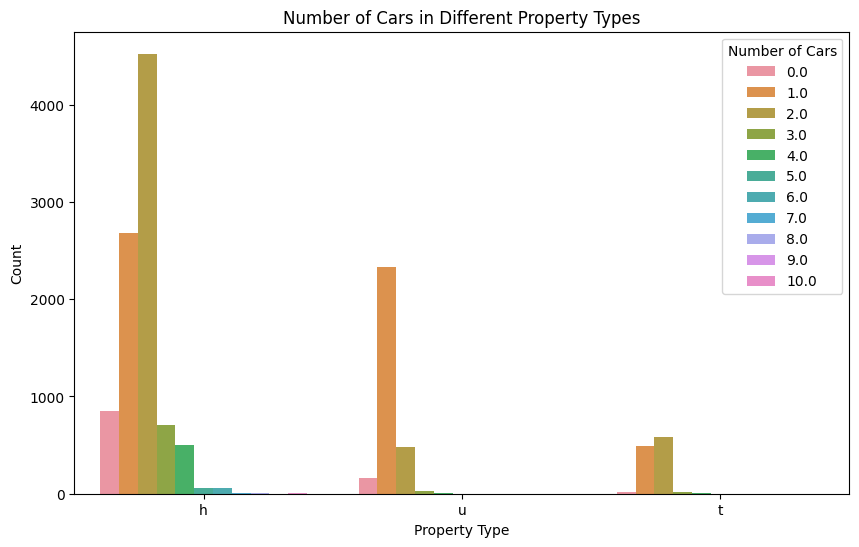

In [134]:
# Plot the number of cars in different property types with x-axis as type and color as car number
plt.figure(figsize=(10, 6))
sns.countplot(x='Type', hue='Car', data=df)
plt.title('Number of Cars in Different Property Types')
plt.xlabel('Property Type')
plt.ylabel('Count')
plt.legend(title='Number of Cars', loc='upper right')
plt.show()

According to the plot, we can find that the number of car parking in unit is probably 1.

In [135]:
df.loc[(df['Car'].isnull())&(df['Type']!='h'), 'Car'] = 1

We will fill 1 car for the missing data in unit.

For the house, we can see the distribution of car parking in different number of rooms.

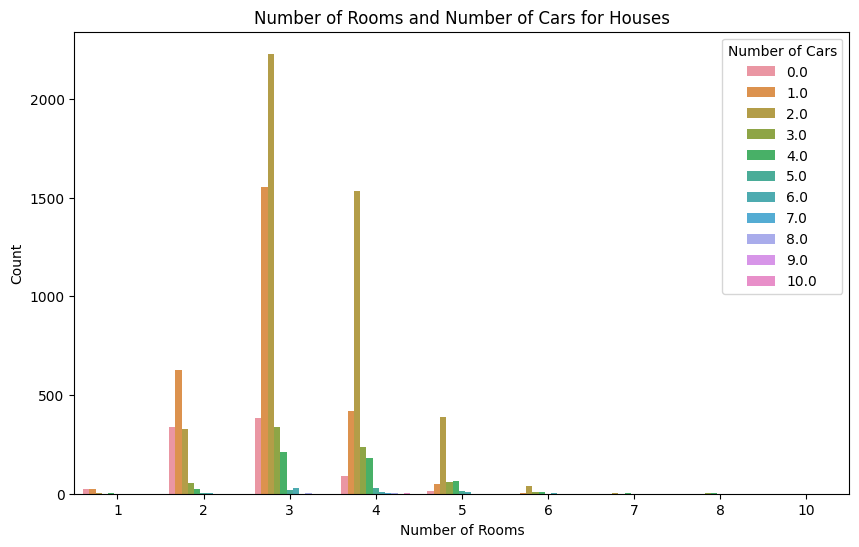

In [136]:
# Filter data for houses only
houses_data = df[df['Type'] == 'h']

# Plot the number of rooms and number of cars for houses
plt.figure(figsize=(10, 6))
sns.countplot(x='Rooms', hue='Car', data=houses_data)
plt.title('Number of Rooms and Number of Cars for Houses')
plt.xlabel('Number of Rooms')
plt.ylabel('Count')
plt.legend(title='Number of Cars', loc='upper right')
plt.show()

According to the plot, we will fill 1 car parking if rooms number no more than 3, and others fill 2 car parking.

In [137]:
df.loc[(df['Car'].isnull())&(df['Type']=='h')&(df['Rooms']< 3), 'Car'] = 1

In [138]:
df.loc[(df['Car'].isnull())&(df['Type']=='h')&(df['Rooms'] >= 3), 'Car'] = 2

For the remainder column, we do not have sufficient evidence to accurately fill in the 'BuildingArea' and 'YearBuilt' fields.

In [139]:
# missing data
df.isnull().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                 0
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea         0
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

For the building area and year built, we do not have the enough proof to get the value fill in these missing values.

## Price Analysis

First have a look at the price distribution. We can see the price distribution is a little bit skew.

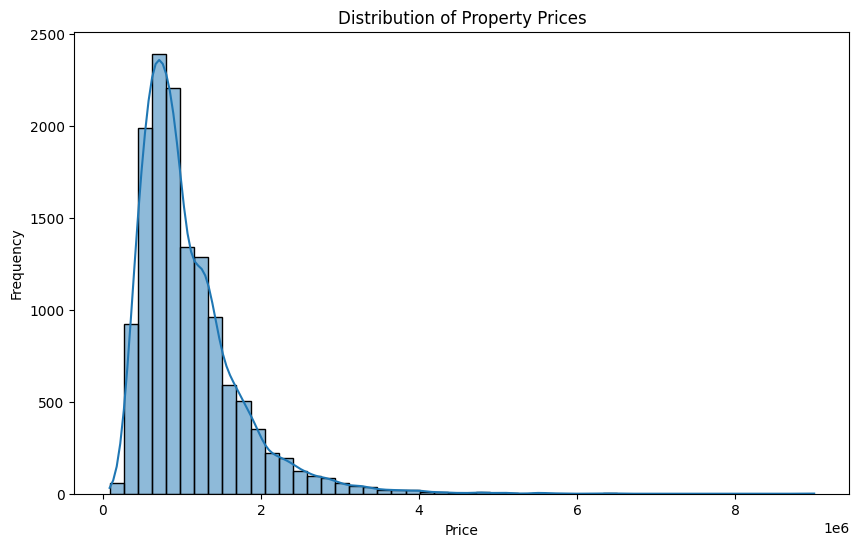

In [140]:
# Plot the distribution of property prices
plt.figure(figsize=(10, 6))
sns.histplot(df['Price'], bins=50, kde=True)
plt.title('Distribution of Property Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

Let's take a look at the boxplot; it shows that more than 95% of property prices are under $2,350,000. We will focus on these properties.

Text(0.5, 0, 'Price')

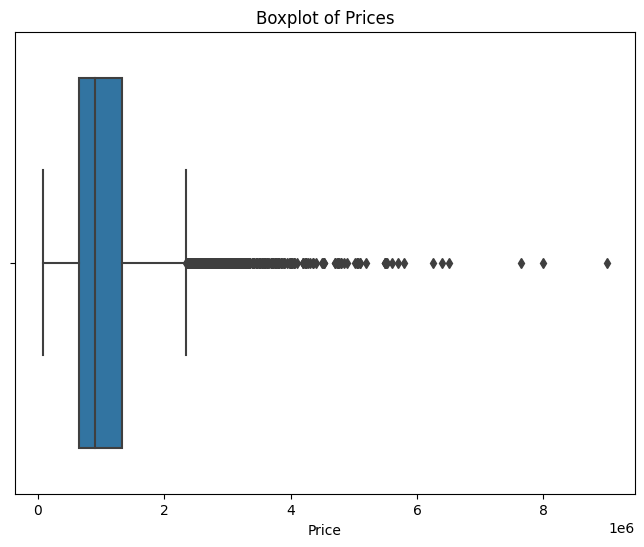

In [141]:
plt.figure(figsize=(8, 6))

# Plot the boxplot of prices
sns.boxplot(x=df['Price'])
plt.title('Boxplot of Prices')
plt.xlabel('Price')

In [109]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Determine the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(upper_bound)

# Identify outliers
outliers = df[(df['Price'] < lower_bound) | (df['Price'] > upper_bound)]

# Count the number of outliers
num_outliers = outliers.shape[0]

print(num_outliers)

2350000.0
612


## Location analysis

Because of a few outliers, we omit the top 5% from the data to build the plot. 

In [150]:
bottom_95p = df.Price < np.percentile(df.Price, 95)
df_95=df[bottom_95p].copy()

According to the map, we see that the more expensive houses are located in the bay area of Melbourne and the Southern and Eastern Metropolitan Regions. 

Certain suburbs can be particularly expensive, indicating that the location significantly influences house prices.

<Axes: xlabel='Longtitude', ylabel='Lattitude'>

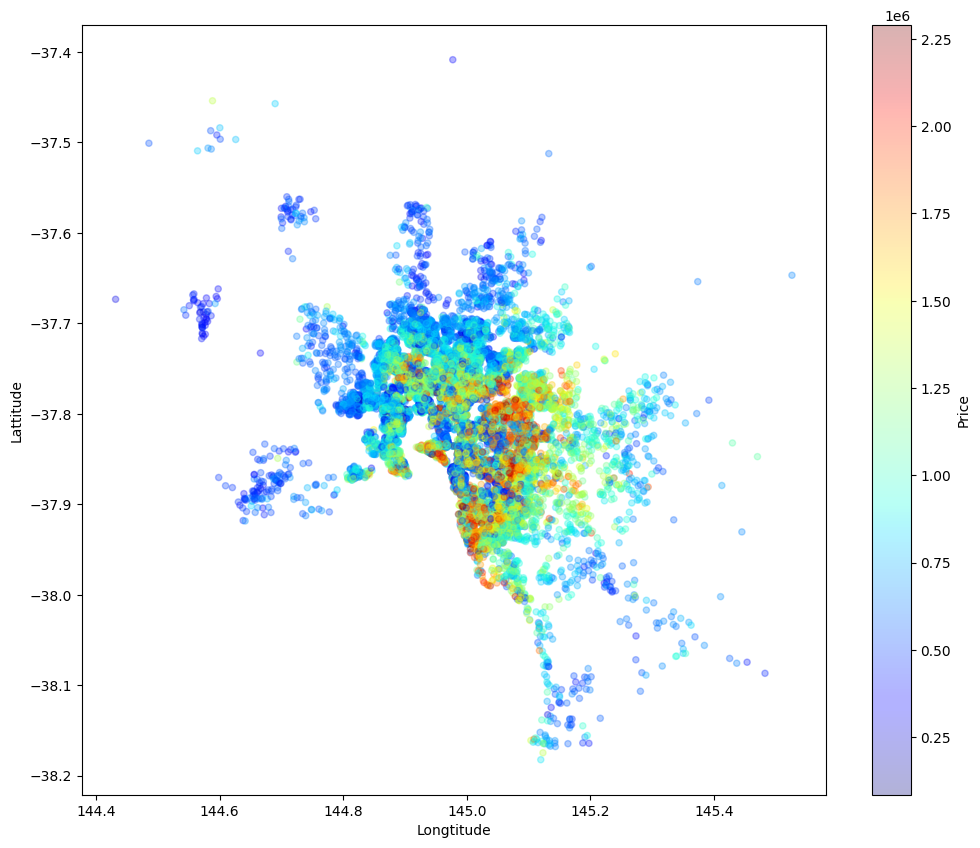

In [156]:

df_95.plot(kind='scatter', x='Longtitude', y='Lattitude', alpha=0.3, figsize=(12,10)
             , c='Price', cmap=plt.get_cmap('jet'), colorbar=True)

## Property Type Analysis

We see that the different property type have different distribution in price. It also indicate that property type can also have an impact on property prices.

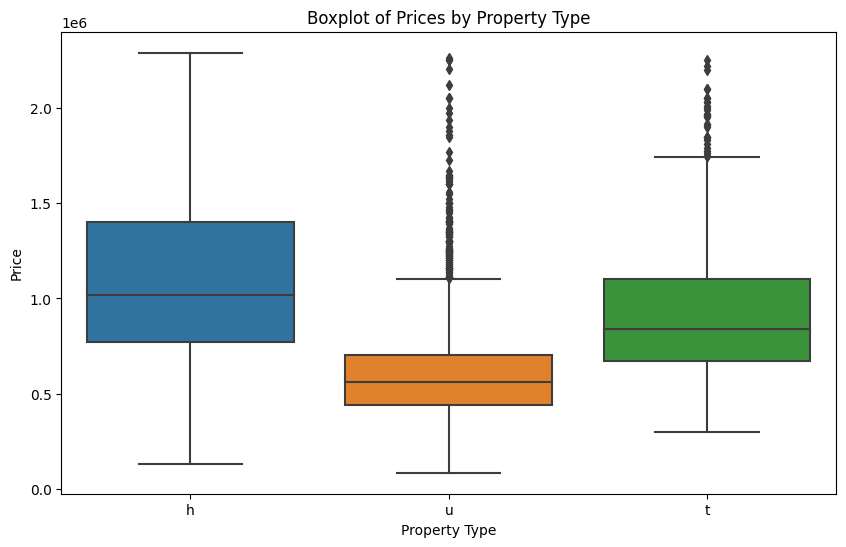

In [151]:
# Plot the boxplot of prices by property type
plt.figure(figsize=(10, 6))
sns.boxplot(x='Type', y='Price', data=df_95)
plt.title('Boxplot of Prices by Property Type')
plt.xlabel('Property Type')
plt.ylabel('Price')
plt.show()

## Time analysis

In the middle of 2017, there is a sudden decline in prices. Temporal fluctuations can also influence house prices.

/var/folders/mv/wn9fb66n74zgfm_pdhrxtpm40000gn/T/ipykernel_53852/3478364275.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  houses_df['Date'] = pd.to_datetime(houses_df['Date'], format='%d/%m/%Y')


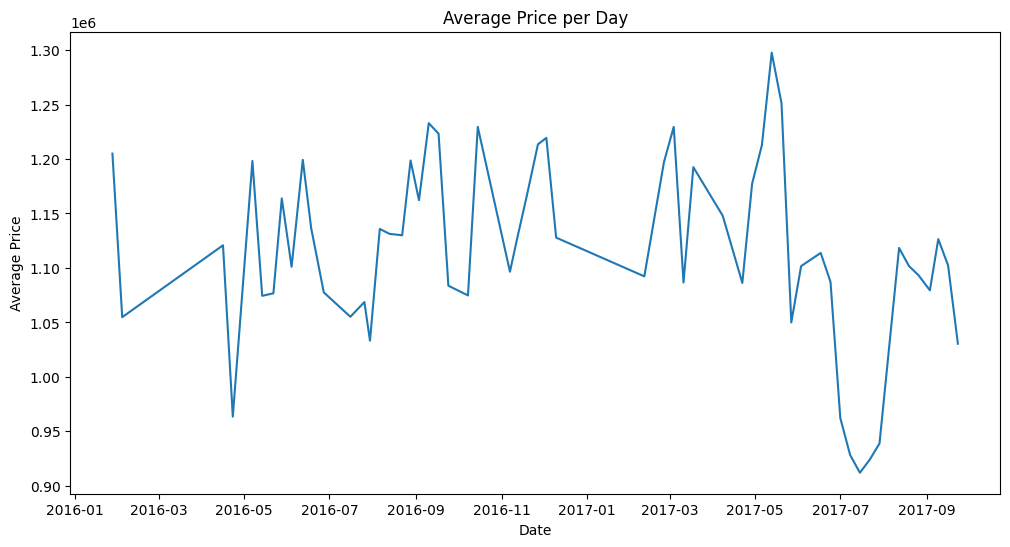

In [155]:
houses_df = df_95[df_95['Type'] == 'h']
houses_df['Date'] = pd.to_datetime(houses_df['Date'], format='%d/%m/%Y')

# Calculate the average price per day
average_price_per_day = houses_df.groupby('Date')['Price'].mean().reset_index()

# Plot the average price per day
plt.figure(figsize=(12, 6))
plt.plot(average_price_per_day['Date'], average_price_per_day['Price'])
plt.title('Average Price per Day')
plt.xlabel('Date')
plt.ylabel('Average Price')
plt.show()

## Property Characteristics Analysis

The bedroom have the high correlation with the price, we could consider this as important effect on property price.

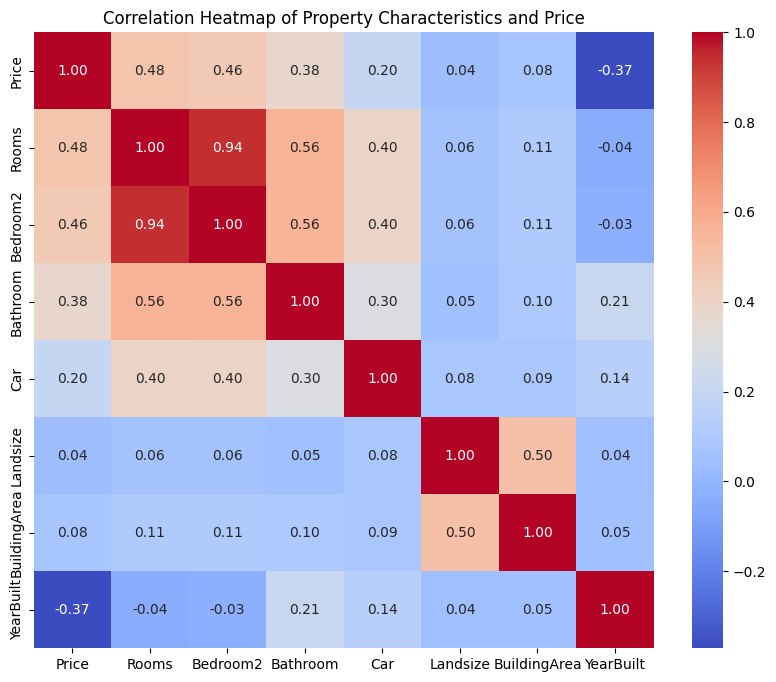

In [158]:
# Select the relevant columns for the heatmap
heatmap_data = df_95[['Price', 'Rooms', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt']]

# Compute the correlation matrix
correlation_matrix = heatmap_data.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Property Characteristics and Price')
plt.show()

## Suggestion

In conclusion, buyers should prioritize understanding the suburb and market timing, evaluate the number of bedrooms and overall rooms, and consider property type when making a purchase decision.

### Consideration of Suburb and Timing


Certain suburbs can be significantly more expensive than others. Buyers should carefully consider the location of the property, as it plays a crucial role in determining the overall cost.


Property prices are subject to temporal fluctuations. Historical data shows that prices can vary over time, with notable trends such as the sudden decline observed in mid-2017. Buyers should be aware of market trends and timing when making a purchase.

### Property Type

Houses tend to be more expensive compared to units and townhouses. One reason for this higher cost is that houses generally have more rooms, which contributes to their increased value. Buyers looking for more affordable options may consider units or townhouses.

### Key Property Characteristics

The number of bedrooms has a significant impact on property prices. Properties with more bedrooms generally command higher prices, making it a critical factor for buyers to consider based on their budget and space requirements.

Similar to bedrooms, the overall number of rooms and bathrooms in a property also correlates positively with price. More rooms and bathrooms typically indicate a higher value.